# Machine Learning Projet
M2 Informatique BI&A (2022-2023)
---

#Auteur:

Michał Wiśniewski
michal.wisniewski@univ-lyon2.fr

In [1]:
# import required modules 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('always')
import seaborn as sns 
%matplotlib inline 

In [4]:
# read the dataset 
df = pd.read_csv("/content/winequality-red.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 1. Exploratory Data Analysis 
* Afficher les noms de colonne, le type de données de chaque colonne et le nombre non nul
* 1- Résumer les principales caractéristiques des données
* 2- Mieux comprendre le jeu de données
* 3- Découvrir la relation entre différentes variables
* 4- Extraire les variables importantes pour le problème

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, '#Num of samples per each class')

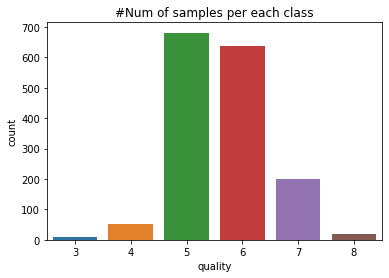

In [ ]:
# determining number of samples in each class 

sns.countplot(x='quality', data=df)
plt.title("#Num of samples per each class")

:* D'après le graphique ci-dessus, nous remarquons que l'ensemble de données est déséquilibré

In [ ]:
# using pie plot 
def pie_plot(data, labels, title):
    sizes = np.unique(data, return_counts=True)[1]

    fig1, ax1 = plt.subplots(figsize=(12, 8))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.title(title)
    plt.show()

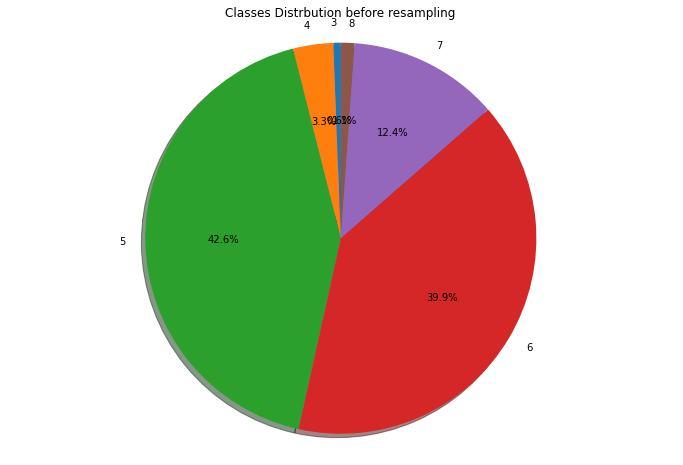

In [ ]:
pie_plot(df['quality'], '3 4 5 6 7 8 '.split(), "Classes Distrbution before resampling ")

Répartition des variables
* tracer l'histogramme d'une variable
* moyenne du tracé, médiane sur le même tracé

In [ ]:
# Function to show summary stats and distribution for a column
def show_distribution(var_data, bins=25):

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,10))

    # Plot the histogram   
    ax[0].hist(var_data, bins=bins)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

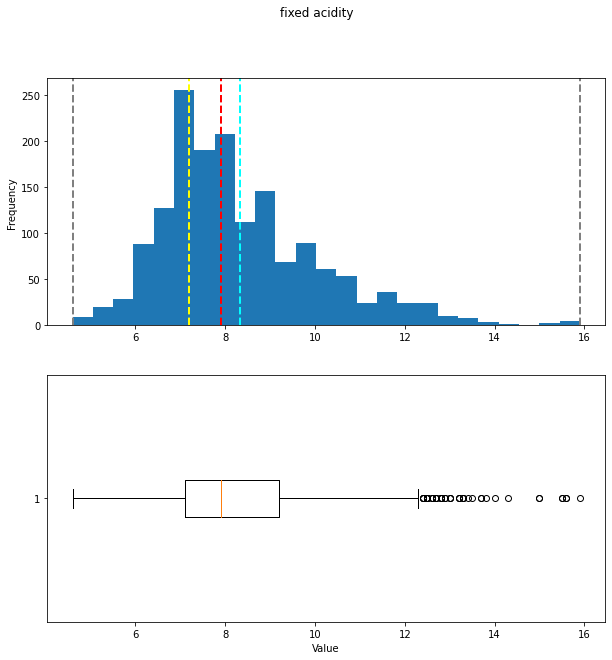

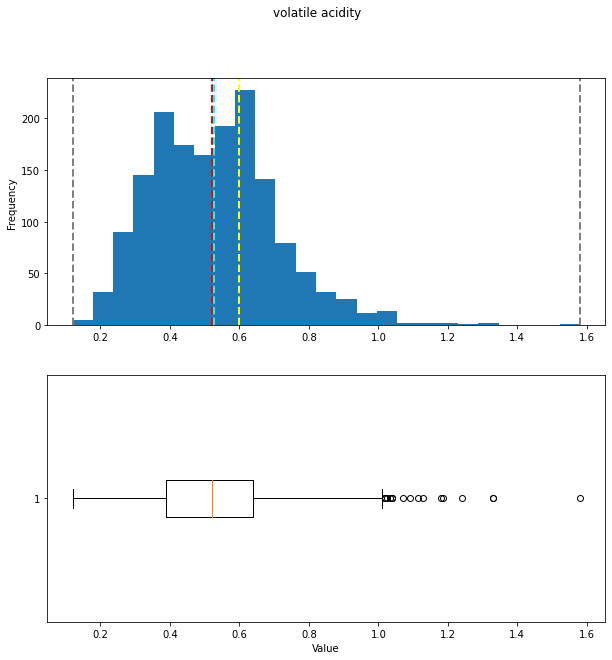

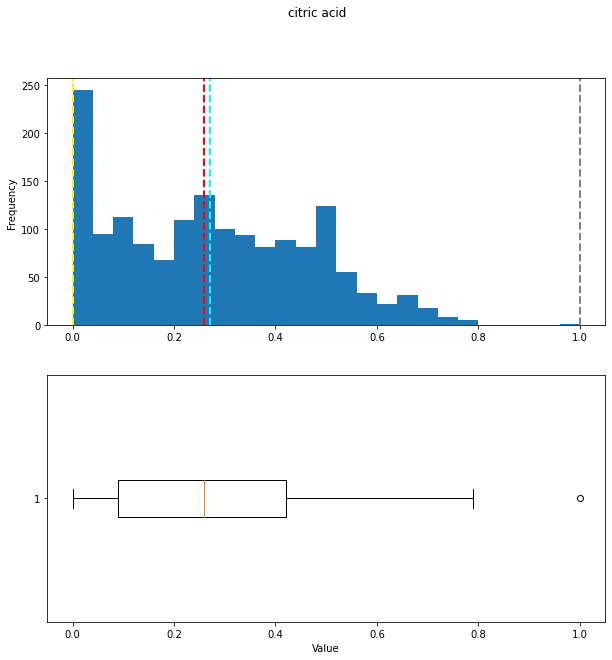

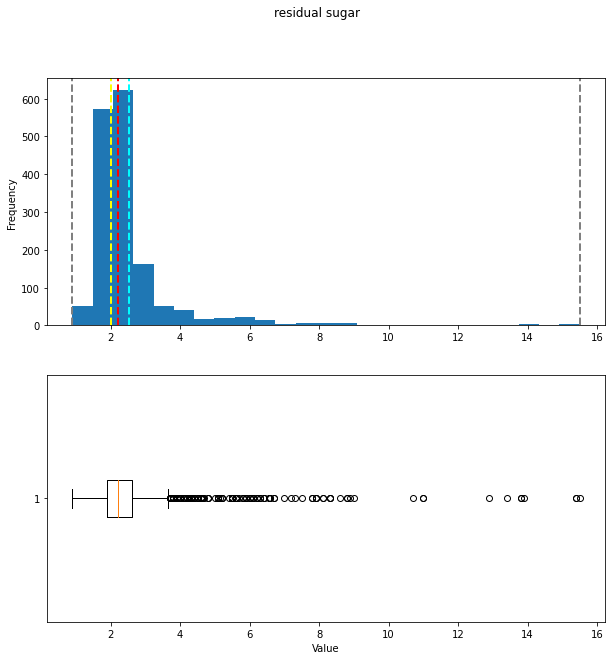

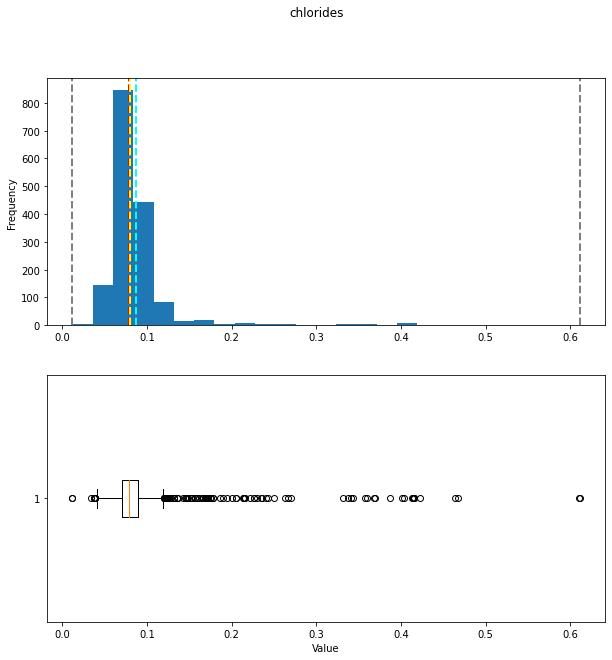

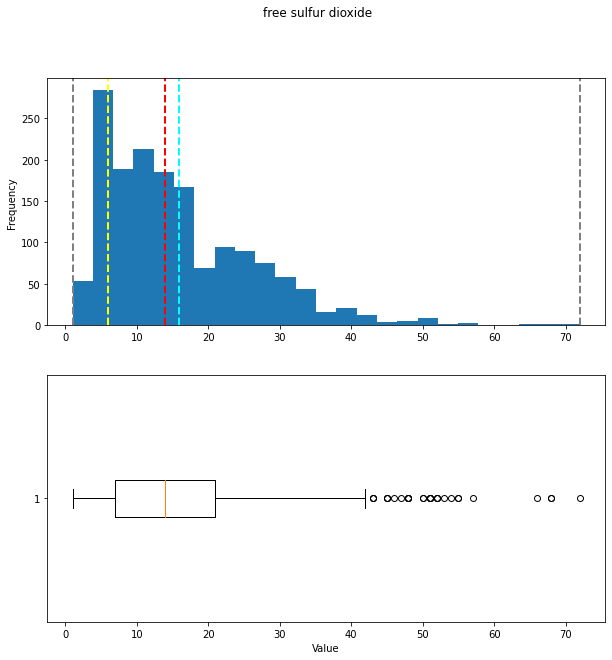

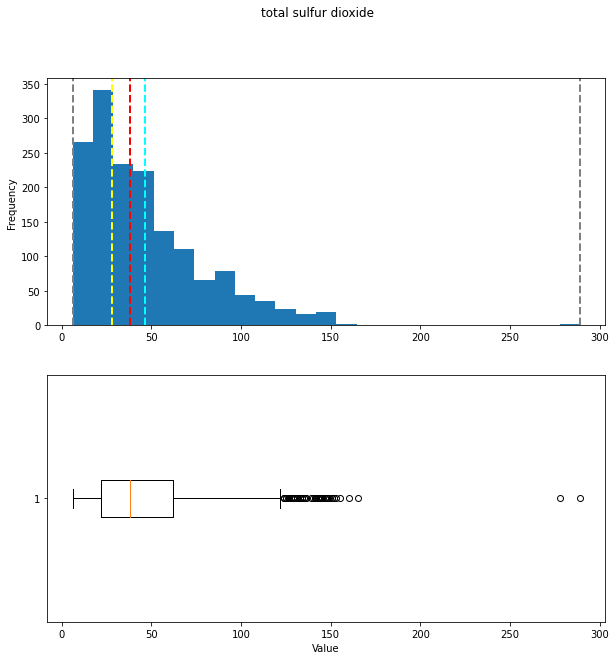

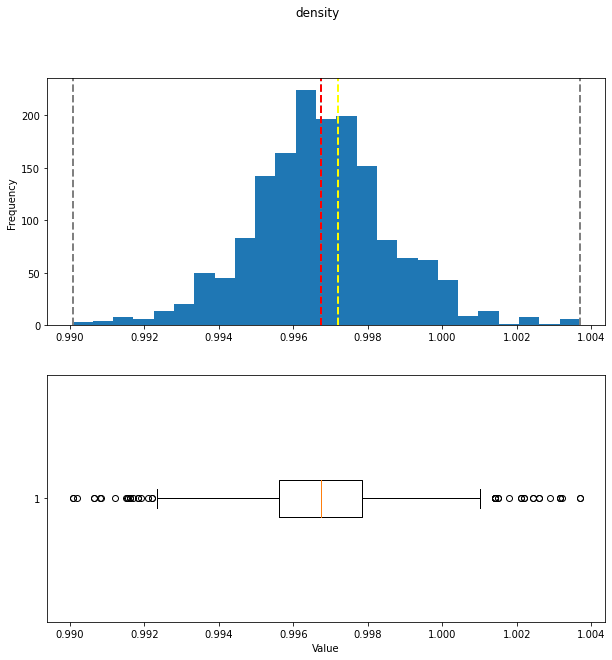

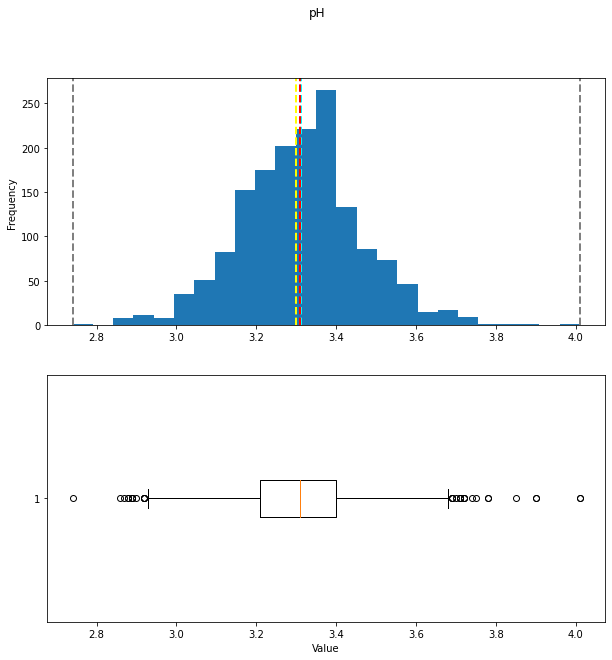

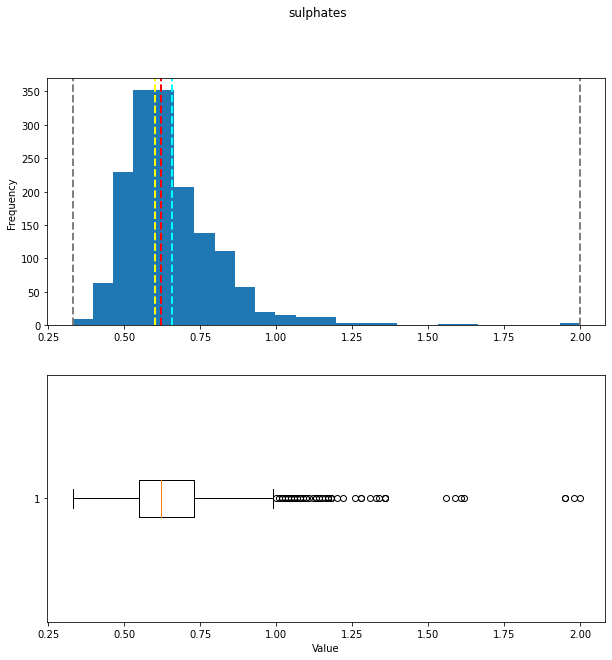

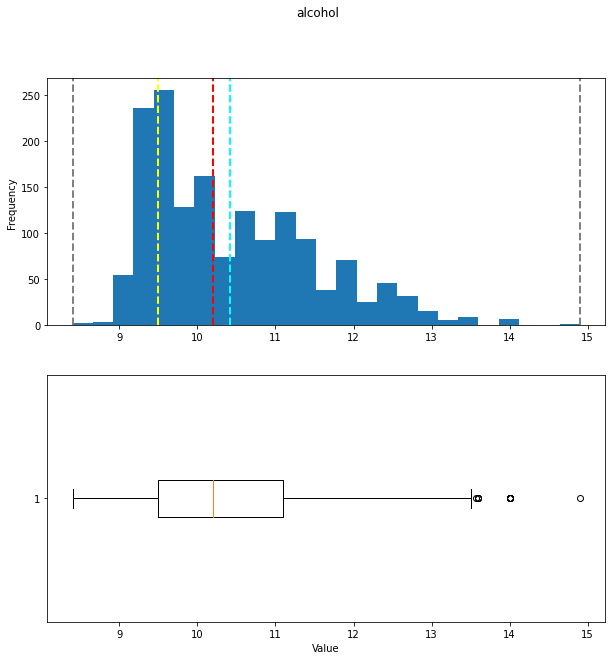

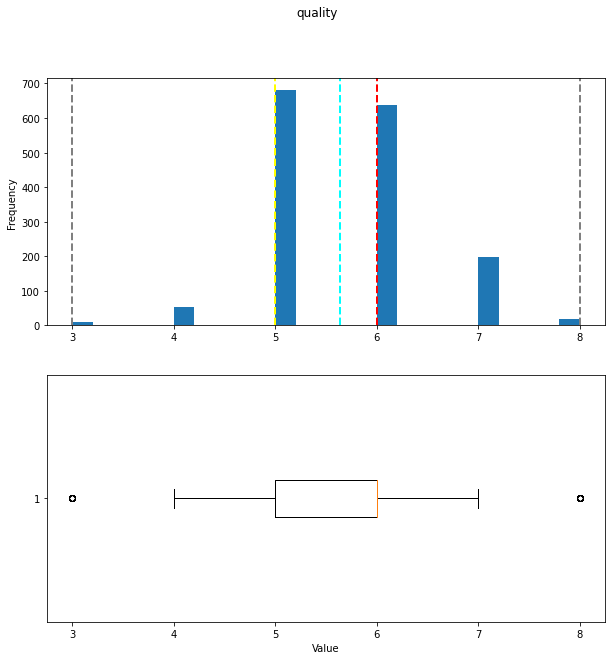

In [ ]:
for column in df.columns:
    show_distribution(df[column])

Nous remarquons que certaines variables sont approximativement distribuées normalement comme la densité et le pH, certaines variables ont une distribution asymétrique comme le dioxyde de soufre total et d'autres n'ont pas de distribution claire et beaucoup de valeurs aberrantes

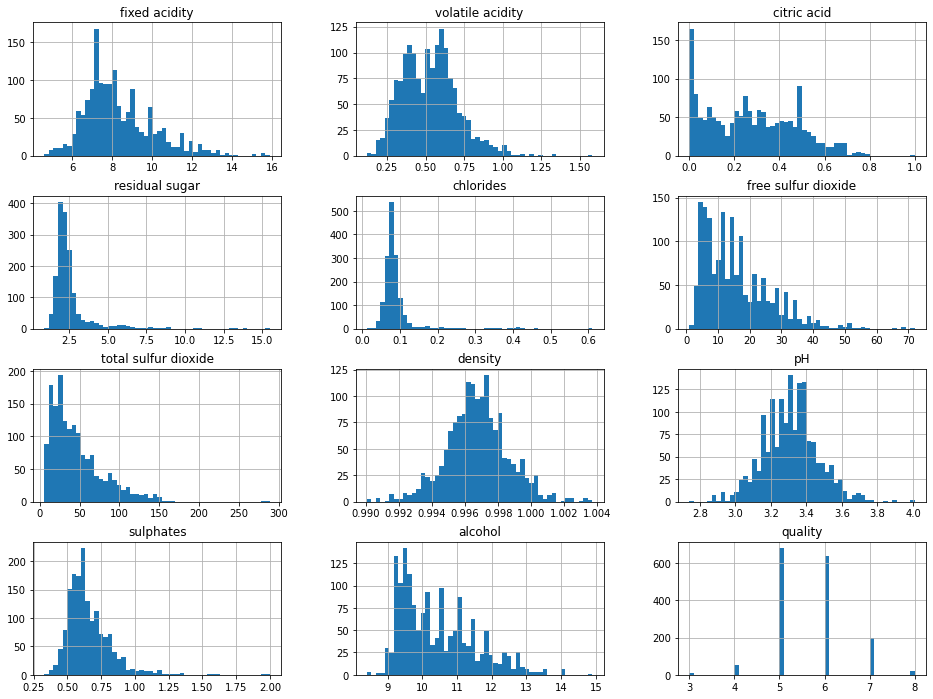

In [ ]:

df[df.columns].hist(bins=50, figsize=(16, 12))

plt.show()

# 1.1 Relation entre variables

---


* using scatter plot 
* using correlation coeffiecient and p-value 

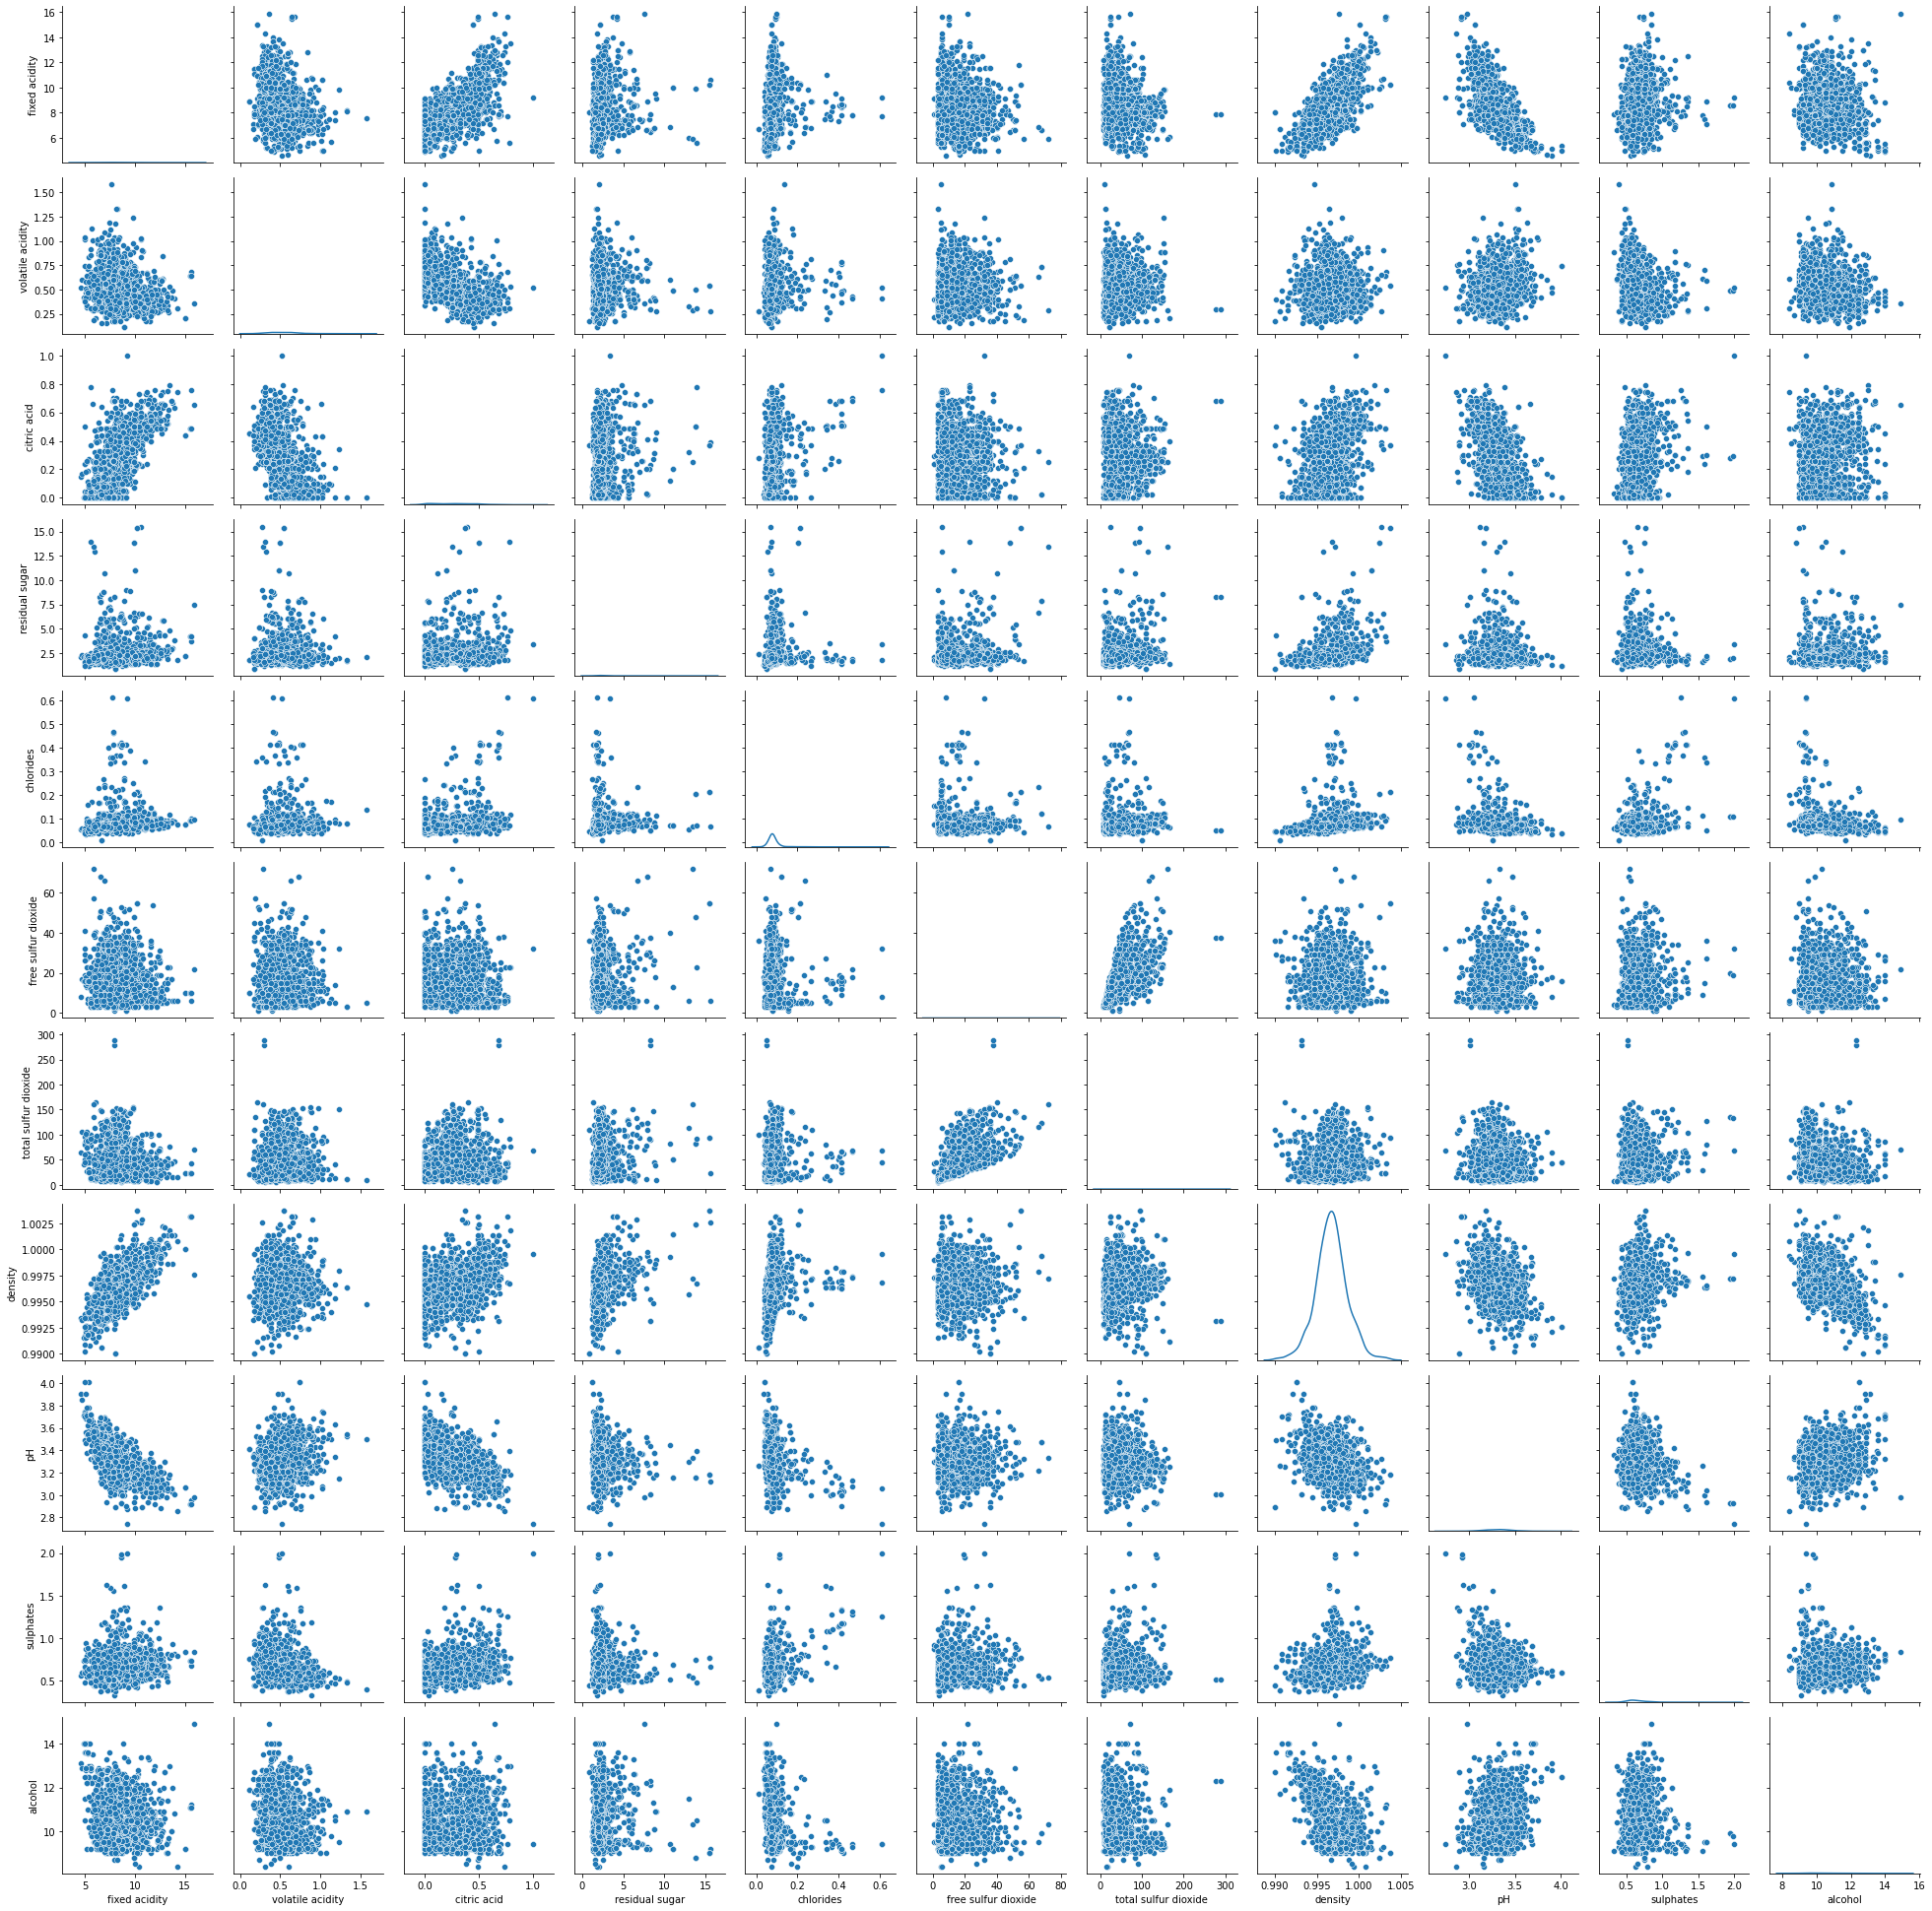

In [ ]:
#using scatter plot 

#create pair grid 
grid = sns.PairGrid(df[df.columns.tolist()[:-1]])

# specifiy kde plot in main diagonal 
grid.map_diag(sns.kdeplot)

# scatter plot under main diag
grid.map_lower(sns.scatterplot)

#scatter plot above main diag
grid.map_upper(sns.scatterplot)

plt.show()

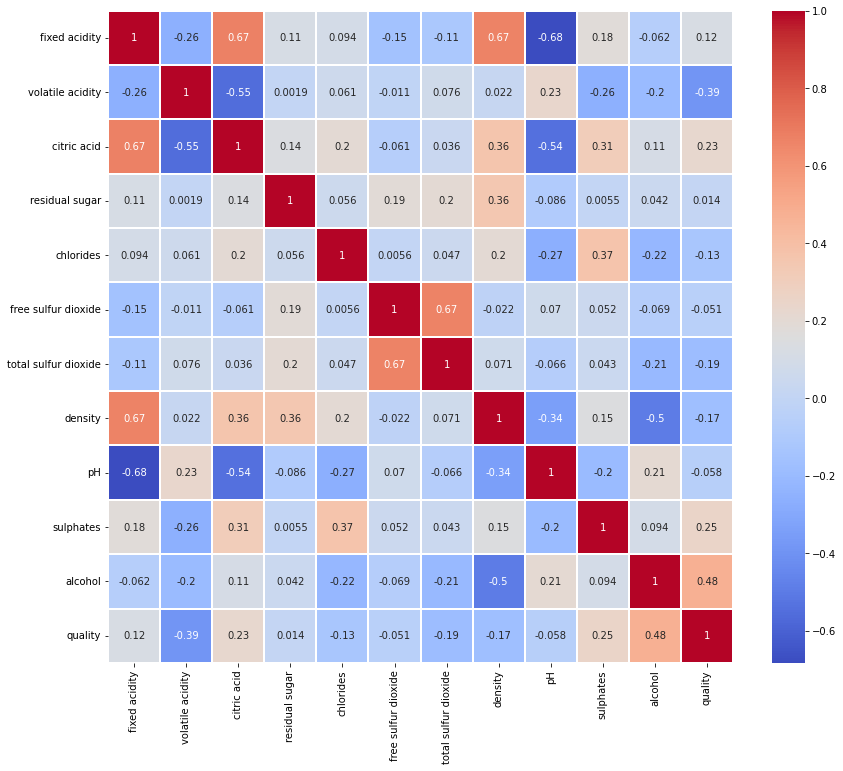

In [ ]:
# using corr coeffiecent 
fig, ax = plt.subplots(figsize=(14,12))  
sns.heatmap(df.corr(), linewidths=1, cmap='coolwarm', annot=True, ax=ax)

#plot heaetmap
plt.show()

* Ici, il existe des corrélations linéaires entre les variables, par exemple :

1- (pH, densité) linéairement corrélé à l'acidité fixe
2- qualité et alcool (ce n'est pas assez bon)

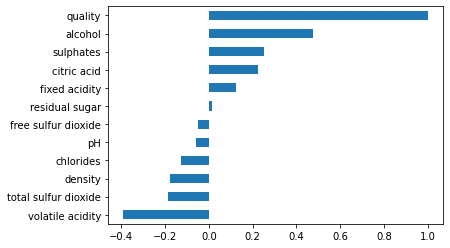

In [ ]:
df.corr()['quality'].sort_values().plot.barh()

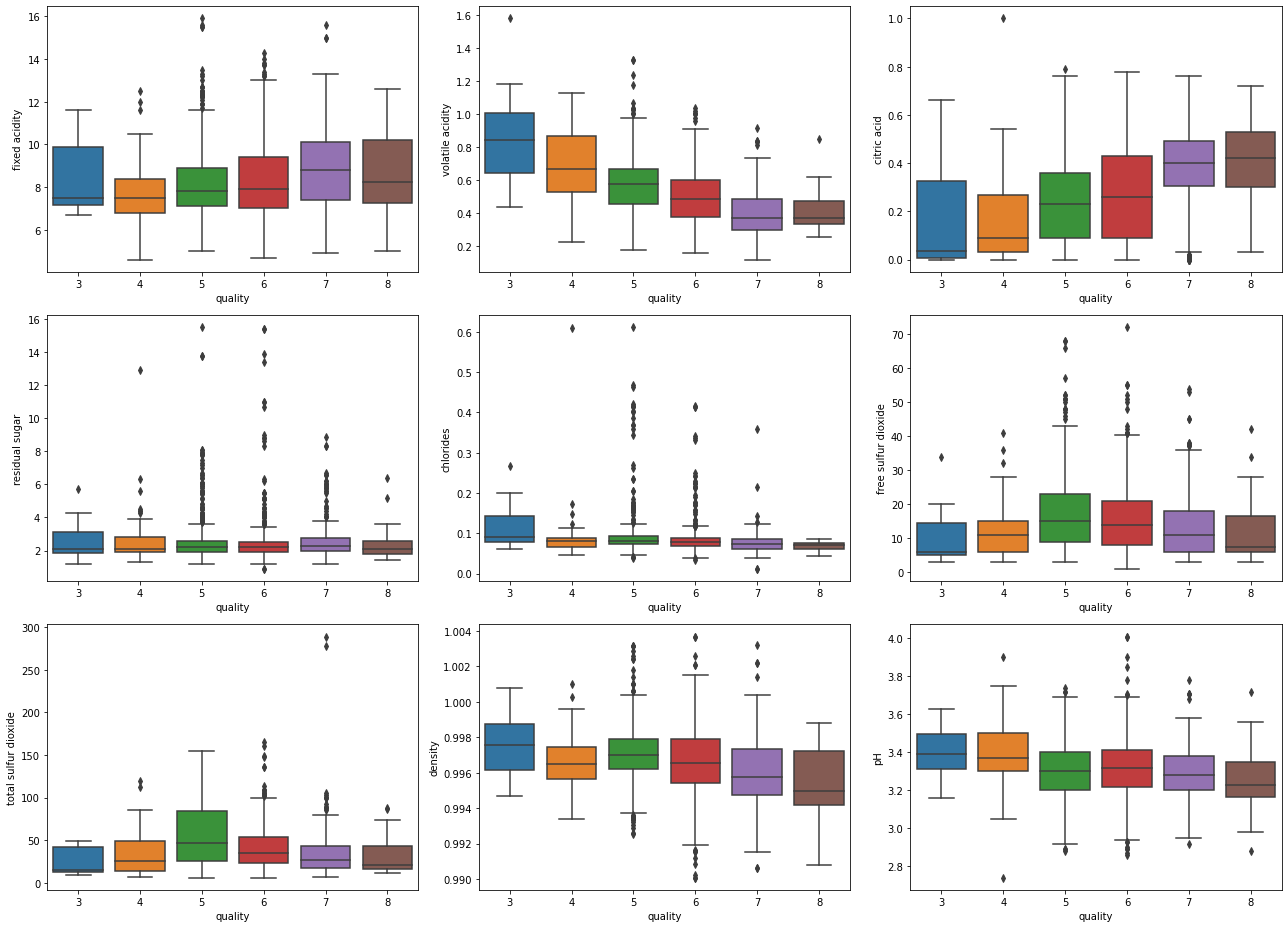

In [ ]:
# Analysis of variance 
# group data by quality varaible and plot box plot for each group 
fig, ax = plt.subplots(3, 3, figsize=(18, 13))
k = 0
for i in range(3):
  for j in range(3):
      sns.boxplot(data=df, x='quality', y=df.columns.tolist()[k], ax= ax[i, j])
      k += 1

plt.tight_layout()
plt.show()

# 2. Data cleaning and preprocessing  

* 2.1 Supprimer les valeurs aberrantes
* 2.2 Normalisation




In [ ]:
def remove_outliers(col, low_percentile=0.01, high_percentile=0.95):
    low_percentile = df[col].quantile(low_percentile)
    high_percentile = df[col].quantile(high_percentile)
    return df[(df[col]<high_percentile) & (df[col]>low_percentile)]

In [ ]:
for col in df.columns.tolist()[:-1]:
    print('dataframe shape before remove outlires from column {} : {}'.format(col, df.shape))
    df = remove_outliers(col, high_percentile=0.98)
    print('dataframe shape after remove outlires from column {} : {}'.format(col, df.shape))


dataframe shape before remove outlires from column fixed acidity : (1599, 12)
dataframe shape after remove outlires from column fixed acidity : (1546, 12)
dataframe shape before remove outlires from column volatile acidity : (1546, 12)
dataframe shape after remove outlires from column volatile acidity : (1497, 12)
dataframe shape before remove outlires from column citric acid : (1497, 12)
dataframe shape after remove outlires from column citric acid : (1343, 12)
dataframe shape before remove outlires from column residual sugar : (1343, 12)
dataframe shape after remove outlires from column residual sugar : (1282, 12)
dataframe shape before remove outlires from column chlorides : (1282, 12)
dataframe shape after remove outlires from column chlorides : (1243, 12)
dataframe shape before remove outlires from column free sulfur dioxide : (1243, 12)
dataframe shape after remove outlires from column free sulfur dioxide : (1181, 12)
dataframe shape before remove outlires from column total sulfu



```
# Function to train and test model 
```



In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report


def train_and_test(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_score = classifier.predict_proba(X_test)[:,1]
    
    
    train_accuracy = classifier.score(X_train, y_train)
    accuracy = classifier.score(X_test, y_test)
    classification_rep = classification_report(y_test, y_pred, zero_division=0)
    con_matrix = confusion_matrix(y_test, y_pred)
    # fpr, tpr, _ = roc_curve(y_test, y_score)
    # roc_auc = auc(fpr, tpr)
    

    # ploting confustion matrix
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names)
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()

    # print scores
    print ("accuracy  score on train : {}".format(train_accuracy))
    print ("accuracy  score on test : {}".format(accuracy))
    # print ("auc  score: {} ".format(roc_auc))
    print(classification_rep)

    # print ROC curve
    # plt.figure()
    # plt.plot(fpr, tpr, color='darkorange',
    #      lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver operating characteristic example')
    # plt.legend(loc="lower right")
    # plt.show()

### 2.2 Normalization using pipeline


In [ ]:
# Define pipeline
numeric_features = list(range(df.shape[1] - 1)) # last column is a target column (quality)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        ])

In [ ]:
X = df.drop('quality', axis=1).values
y = df['quality'].values
target_names = df.quality.unique()
features_names = df.drop('quality', axis=1).columns

# split the data into train, validation and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# 3. Approches non paramétriques

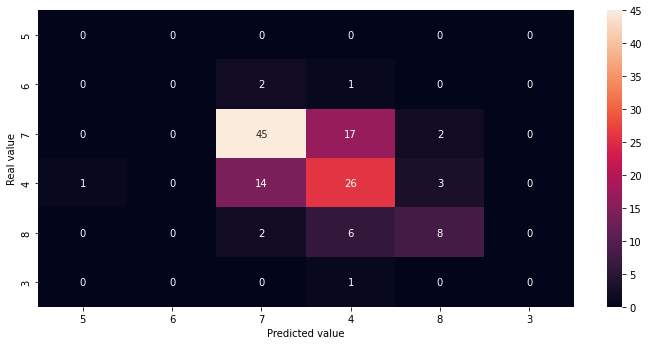

accuracy  score on train : 0.7758470894874022
accuracy  score on test : 0.6171875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.71      0.70      0.71        64
           6       0.51      0.59      0.55        44
           7       0.62      0.50      0.55        16
           8       0.00      0.00      0.00         1

    accuracy                           0.62       128
   macro avg       0.31      0.30      0.30       128
weighted avg       0.61      0.62      0.61       128

CPU times: user 420 ms, sys: 16 ms, total: 436 ms
Wall time: 649 ms


In [ ]:
# first experement with n_neighbors = 3
%%time
knn = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  KNeighborsClassifier(n_neighbors=3))])
train_and_test(knn, X_train, X_valid, y_train, y_valid)

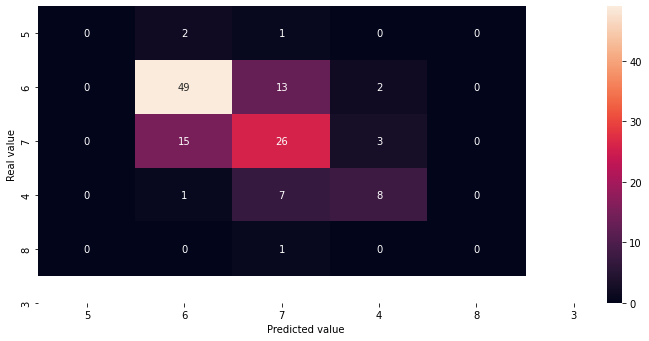

accuracy  score on train : 0.7063423110338836
accuracy  score on test : 0.6484375
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.73      0.77      0.75        64
           6       0.54      0.59      0.57        44
           7       0.62      0.50      0.55        16
           8       0.00      0.00      0.00         1

    accuracy                           0.65       128
   macro avg       0.38      0.37      0.37       128
weighted avg       0.63      0.65      0.64       128

CPU times: user 251 ms, sys: 3.29 ms, total: 254 ms
Wall time: 261 ms


In [ ]:
# first experement with n_neighbors = 5
%%time
knn = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  KNeighborsClassifier(n_neighbors=5))])
train_and_test(knn, X_train, X_valid, y_train, y_valid)

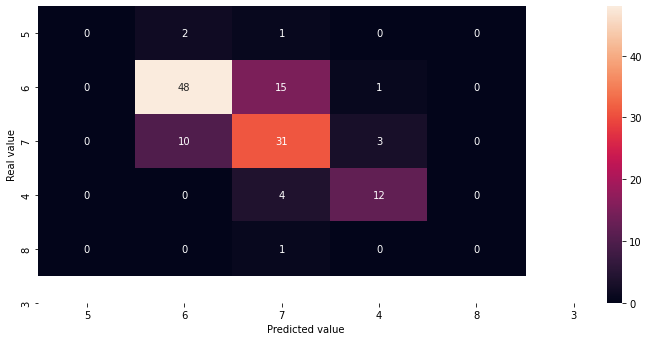

accuracy  score on train : 1.0
accuracy  score on test : 0.7109375
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.80      0.75      0.77        64
           6       0.60      0.70      0.65        44
           7       0.75      0.75      0.75        16
           8       0.00      0.00      0.00         1

    accuracy                           0.71       128
   macro avg       0.43      0.44      0.43       128
weighted avg       0.70      0.71      0.70       128

CPU times: user 252 ms, sys: 2.98 ms, total: 255 ms
Wall time: 261 ms


In [ ]:
# first experement with n_neighbors = 7 and weights = distance not uniform  
%%time
knn = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  KNeighborsClassifier(n_neighbors=7, weights='distance'))])
train_and_test(knn, X_train, X_valid, y_train, y_valid)

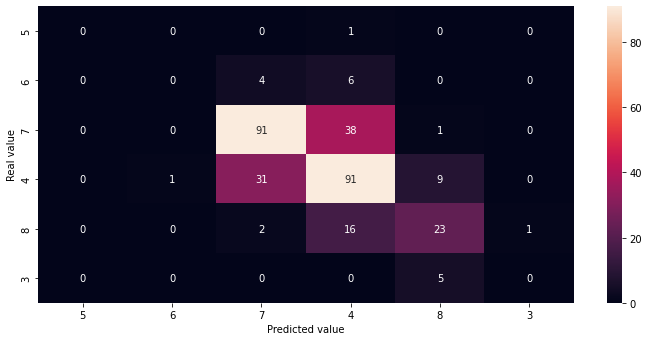

accuracy  score on train : 1.0
accuracy  score on test : 0.640625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.70      0.71       130
           6       0.60      0.69      0.64       132
           7       0.61      0.55      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.64       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.62      0.64      0.63       320

CPU times: user 477 ms, sys: 14.3 ms, total: 491 ms
Wall time: 599 ms


In [ ]:
# from those result we can see that n_neighbors=7 is the best value for number of neighbors
# we will test it on the testset now 
# first experement with n_neighbors = 7 and weights = distance not uniform  
%%time
knn = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  KNeighborsClassifier(n_neighbors=7, weights='distance'))])
train_and_test(knn, X_train, X_test, y_train, y_test)

# Approches paramétriques linéaires

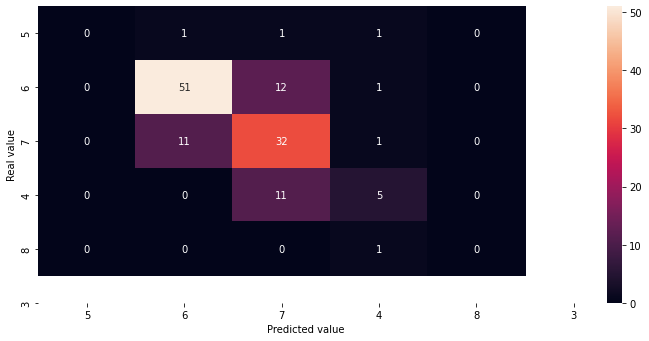

accuracy  score on train : 0.6064291920069504
accuracy  score on test : 0.6875
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.81      0.80      0.80        64
           6       0.57      0.73      0.64        44
           7       0.56      0.31      0.40        16
           8       0.00      0.00      0.00         1

    accuracy                           0.69       128
   macro avg       0.39      0.37      0.37       128
weighted avg       0.67      0.69      0.67       128

CPU times: user 377 ms, sys: 734 µs, total: 378 ms
Wall time: 379 ms


In [ ]:
# using Logistic Regression with solver=saga
%%time
from sklearn.linear_model import LogisticRegression
lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver="saga", max_iter=10000)) ])
train_and_test(lr, X_train, X_valid, y_train, y_valid)

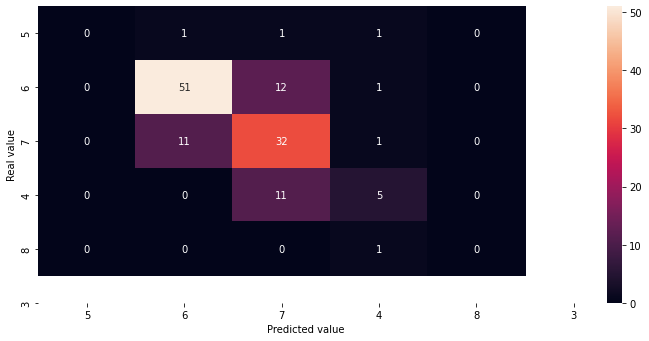

accuracy  score on train : 0.6064291920069504
accuracy  score on test : 0.6875
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.81      0.80      0.80        64
           6       0.57      0.73      0.64        44
           7       0.56      0.31      0.40        16
           8       0.00      0.00      0.00         1

    accuracy                           0.69       128
   macro avg       0.39      0.37      0.37       128
weighted avg       0.67      0.69      0.67       128

CPU times: user 266 ms, sys: 5.83 ms, total: 272 ms
Wall time: 282 ms


In [ ]:
# using Logistic Regression with solver=lbfgs and penality = l2
%%time
from sklearn.linear_model import LogisticRegression
lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver="lbfgs", penalty='l2')) ])
train_and_test(lr, X_train, X_valid, y_train, y_valid)

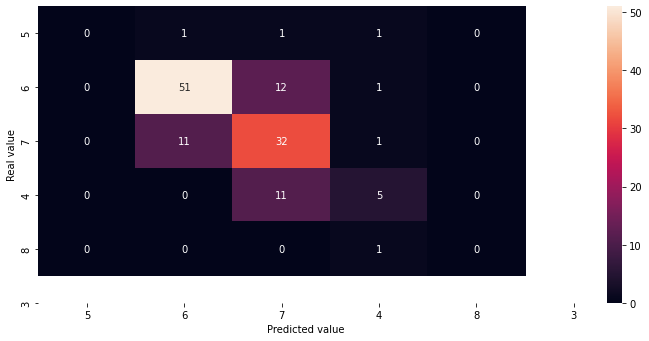

accuracy  score on train : 0.6064291920069504
accuracy  score on test : 0.6875
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.81      0.80      0.80        64
           6       0.57      0.73      0.64        44
           7       0.56      0.31      0.40        16
           8       0.00      0.00      0.00         1

    accuracy                           0.69       128
   macro avg       0.39      0.37      0.37       128
weighted avg       0.67      0.69      0.67       128

CPU times: user 247 ms, sys: 4.1 ms, total: 251 ms
Wall time: 251 ms


In [ ]:
# using Logistic Regression with solver="newton-cg", penalty='l2'
%%time
lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver="newton-cg", penalty='l2', max_iter=10000, )) ])
train_and_test(lr, X_train, X_valid, y_train, y_valid)

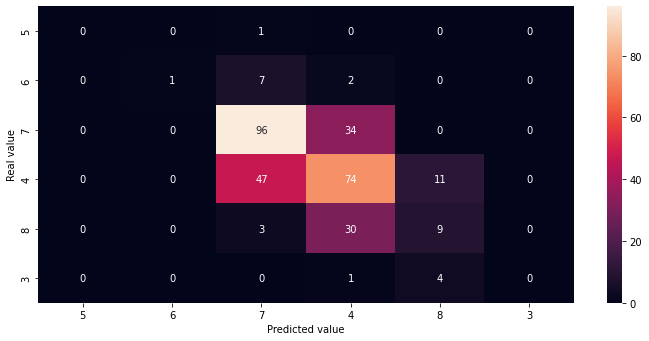

accuracy  score on train : 0.6064291920069504
accuracy  score on test : 0.5625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.62      0.74      0.68       130
           6       0.52      0.56      0.54       132
           7       0.38      0.21      0.27        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.42      0.27      0.28       320
weighted avg       0.55      0.56      0.54       320

CPU times: user 303 ms, sys: 3.65 ms, total: 306 ms
Wall time: 314 ms


In [ ]:
# all hyperparameteres perform equally 

# we will test using solver="lbfgs", penalty='l2'
%%time
from sklearn.linear_model import LogisticRegression
lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver="lbfgs", penalty='l2')) ])
train_and_test(lr, X_train, X_test, y_train, y_test)

## SVM

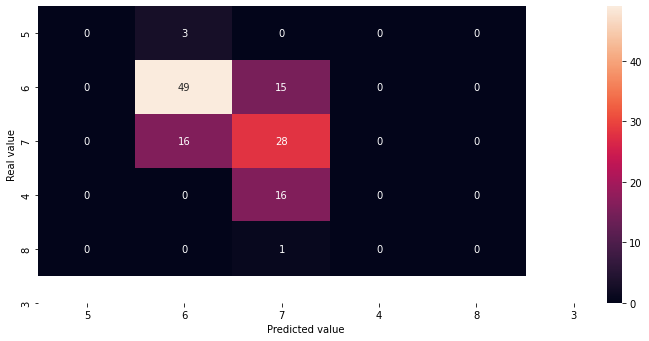

accuracy  score on train : 0.6072980017376195
accuracy  score on test : 0.6015625
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.72      0.77      0.74        64
           6       0.47      0.64      0.54        44
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00         1

    accuracy                           0.60       128
   macro avg       0.24      0.28      0.26       128
weighted avg       0.52      0.60      0.56       128

CPU times: user 766 ms, sys: 9.31 ms, total: 775 ms
Wall time: 800 ms


In [ ]:
%%time
svc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True, C=0.2, max_iter=10000))])
train_and_test(svc, X_train, X_valid, y_train, y_valid)

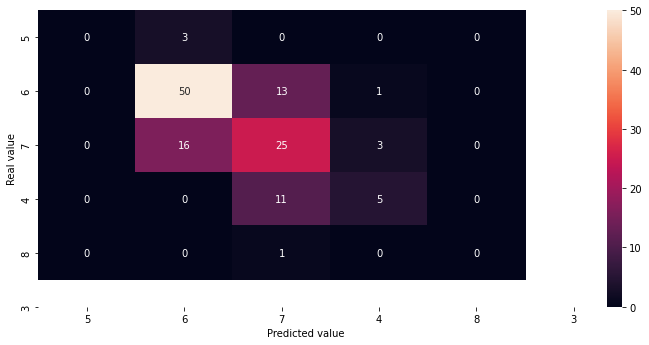

accuracy  score on train : 0.6663770634231103
accuracy  score on test : 0.625
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.72      0.78      0.75        64
           6       0.50      0.57      0.53        44
           7       0.56      0.31      0.40        16
           8       0.00      0.00      0.00         1

    accuracy                           0.62       128
   macro avg       0.36      0.33      0.34       128
weighted avg       0.60      0.62      0.61       128

CPU times: user 862 ms, sys: 7.15 ms, total: 869 ms
Wall time: 925 ms


In [ ]:
%%time
svc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True, C=0.8, max_iter=10000))])
train_and_test(svc, X_train, X_valid, y_train, y_valid)

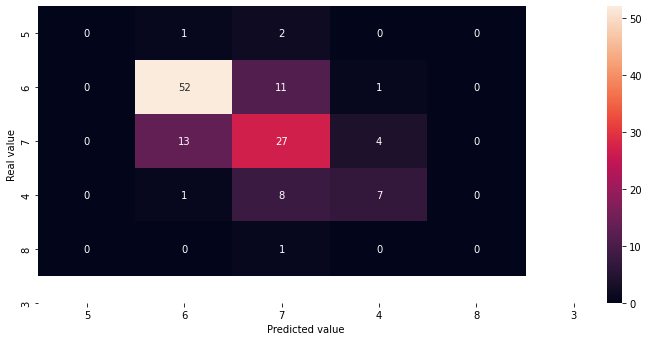

accuracy  score on train : 0.7914856646394439
accuracy  score on test : 0.671875
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.78      0.81      0.79        64
           6       0.55      0.61      0.58        44
           7       0.58      0.44      0.50        16
           8       0.00      0.00      0.00         1

    accuracy                           0.67       128
   macro avg       0.38      0.37      0.37       128
weighted avg       0.65      0.67      0.66       128

CPU times: user 903 ms, sys: 26.5 ms, total: 930 ms
Wall time: 977 ms


In [ ]:
%%time
svc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='rbf', probability=True, C=10, max_iter=10000))])
train_and_test(svc, X_train, X_valid, y_train, y_valid)

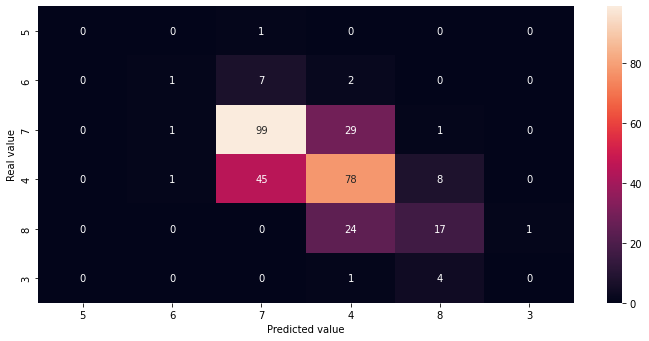

accuracy  score on train : 0.7914856646394439
accuracy  score on test : 0.609375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.10      0.15        10
           5       0.65      0.76      0.70       130
           6       0.58      0.59      0.59       132
           7       0.57      0.40      0.47        42
           8       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.36      0.31      0.32       320
weighted avg       0.59      0.61      0.59       320

CPU times: user 828 ms, sys: 5.29 ms, total: 833 ms
Wall time: 867 ms


In [ ]:
%%time
# SVM with C=10 results high f1-score.
svc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True, C=10, max_iter=10000))])
train_and_test(svc, X_train, X_test, y_train, y_test)

# Approches non linéaires


### Random Forest 

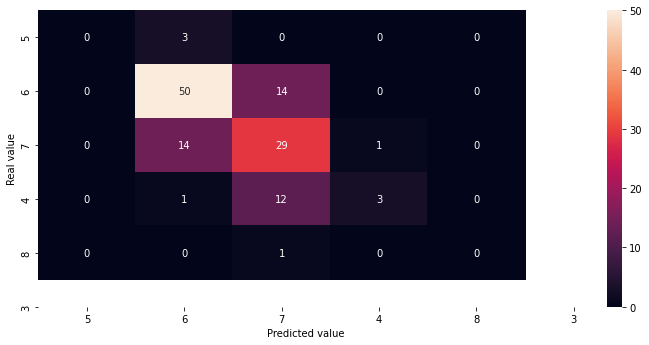

accuracy  score on train : 0.6889661164205039
accuracy  score on test : 0.640625
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.74      0.78      0.76        64
           6       0.52      0.66      0.58        44
           7       0.75      0.19      0.30        16
           8       0.00      0.00      0.00         1

    accuracy                           0.64       128
   macro avg       0.40      0.33      0.33       128
weighted avg       0.64      0.64      0.62       128

CPU times: user 434 ms, sys: 8.04 ms, total: 442 ms
Wall time: 467 ms


In [ ]:
# n_estimators=40, max_depth=10, max_leaf_nodes=20
%%time
rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  RandomForestClassifier(n_estimators=40, max_depth=10, max_leaf_nodes=20))])
train_and_test(rf, X_train, X_valid, y_train, y_valid)

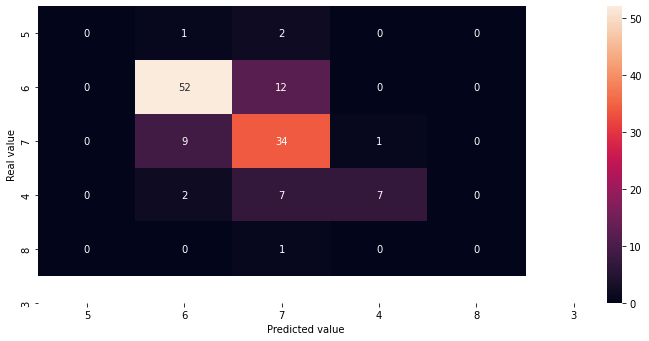

accuracy  score on train : 1.0
accuracy  score on test : 0.7265625
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.81      0.81      0.81        64
           6       0.61      0.77      0.68        44
           7       0.88      0.44      0.58        16
           8       0.00      0.00      0.00         1

    accuracy                           0.73       128
   macro avg       0.46      0.40      0.42       128
weighted avg       0.72      0.73      0.71       128

CPU times: user 729 ms, sys: 5.47 ms, total: 734 ms
Wall time: 790 ms


In [ ]:
# default hyperparameters
%%time
rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  RandomForestClassifier())])
train_and_test(rf, X_train, X_valid, y_train, y_valid)

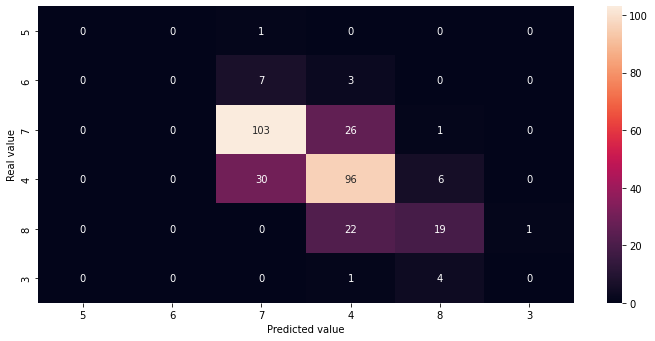

accuracy  score on train : 1.0
accuracy  score on test : 0.68125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.73      0.79      0.76       130
           6       0.65      0.73      0.69       132
           7       0.63      0.45      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.34      0.33      0.33       320
weighted avg       0.65      0.68      0.66       320

CPU times: user 967 ms, sys: 4.62 ms, total: 972 ms
Wall time: 994 ms


In [ ]:
# test using default hyperparameters
%%time
rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  RandomForestClassifier())])
train_and_test(rf, X_train, X_test, y_train, y_test)

### Decision Tree

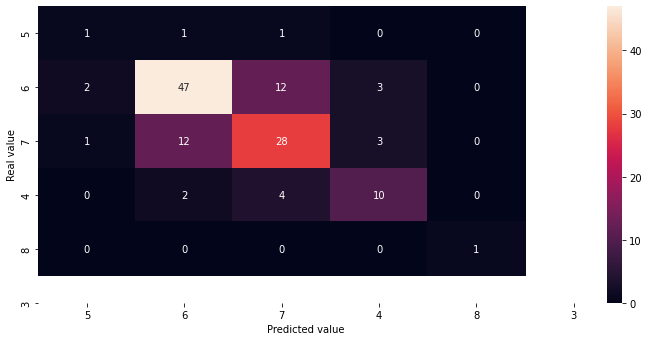

accuracy  score on train : 1.0
accuracy  score on test : 0.6796875
              precision    recall  f1-score   support

           4       0.25      0.33      0.29         3
           5       0.76      0.73      0.75        64
           6       0.62      0.64      0.63        44
           7       0.62      0.62      0.62        16
           8       1.00      1.00      1.00         1

    accuracy                           0.68       128
   macro avg       0.65      0.67      0.66       128
weighted avg       0.68      0.68      0.68       128

CPU times: user 312 ms, sys: 6.18 ms, total: 318 ms
Wall time: 350 ms


In [ ]:
#default hyperparameters
%%time
dt = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier()) ])
train_and_test(dt, X_train, X_valid, y_train, y_valid)

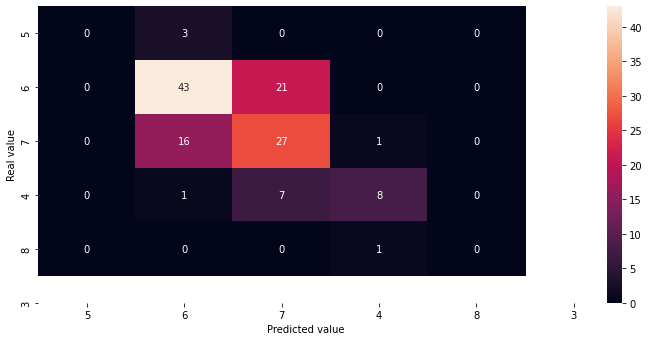

accuracy  score on train : 0.6411815812337098
accuracy  score on test : 0.609375
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.68      0.67      0.68        64
           6       0.49      0.61      0.55        44
           7       0.80      0.50      0.62        16
           8       0.00      0.00      0.00         1

    accuracy                           0.61       128
   macro avg       0.39      0.36      0.37       128
weighted avg       0.61      0.61      0.60       128

CPU times: user 317 ms, sys: 5.84 ms, total: 323 ms
Wall time: 356 ms


In [ ]:
# max_depth=4, min_samples_leaf=2
%%time
dt = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)) ])
train_and_test(dt, X_train, X_valid, y_train, y_valid)

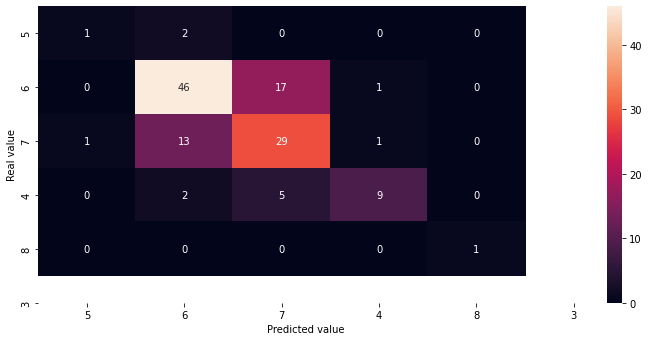

accuracy  score on train : 0.8105994787141616
accuracy  score on test : 0.671875
              precision    recall  f1-score   support

           4       0.50      0.33      0.40         3
           5       0.73      0.72      0.72        64
           6       0.57      0.66      0.61        44
           7       0.82      0.56      0.67        16
           8       1.00      1.00      1.00         1

    accuracy                           0.67       128
   macro avg       0.72      0.65      0.68       128
weighted avg       0.68      0.67      0.67       128

CPU times: user 314 ms, sys: 6.07 ms, total: 320 ms
Wall time: 345 ms


In [ ]:
# max_depth=8
%%time
dt = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=8)) ])
train_and_test(dt, X_train, X_valid, y_train, y_valid)

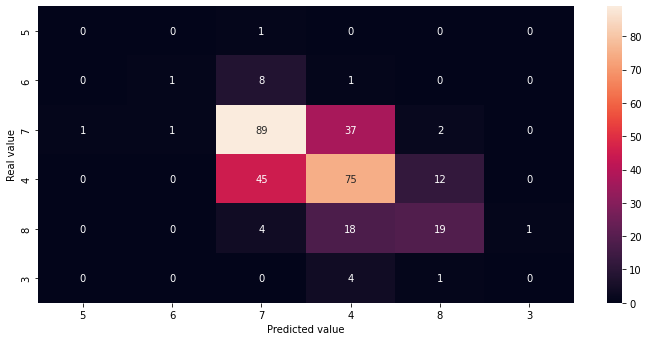

accuracy  score on train : 0.8105994787141616
accuracy  score on test : 0.575
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.10      0.17        10
           5       0.61      0.68      0.64       130
           6       0.56      0.57      0.56       132
           7       0.56      0.45      0.50        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.37      0.30      0.31       320
weighted avg       0.56      0.57      0.56       320

CPU times: user 378 ms, sys: 13.3 ms, total: 391 ms
Wall time: 406 ms


In [ ]:
# test using max_depth=8
%%time
dt = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=8)) ])
train_and_test(dt, X_train, X_test, y_train, y_test)

### XGBoost

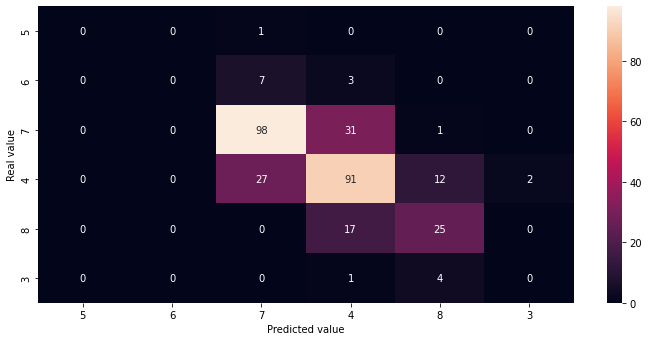

accuracy  score on train : 0.9904430929626412
accuracy  score on test : 0.66875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.74      0.75      0.75       130
           6       0.64      0.69      0.66       132
           7       0.60      0.60      0.60        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.33      0.34      0.33       320
weighted avg       0.64      0.67      0.65       320

CPU times: user 546 ms, sys: 30.8 ms, total: 577 ms
Wall time: 656 ms


In [ ]:
%%time
XG = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGBClassifier(learning_rate= 0.3, 
                                max_depth= 8, 
                                n_estimators= 20, 
                                subsample= 0.7))])
train_and_test(XG, X_train, X_test, y_train, y_test)


# Suggestions
* Oversampling using SMOTE algorithm 

In [ ]:
# oversampling 
X = df.drop('quality', axis=1).values
y = df['quality'].values
X, y = SMOTE().fit_resample(X, y)
target_names = df.quality.unique()
features_names = df.drop('quality', axis=1).columns

# split the data into train, validation and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)



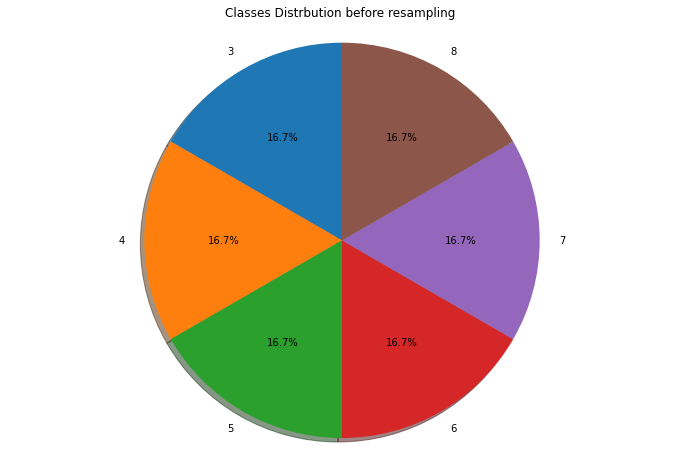

In [ ]:
pie_plot(y, '3 4 5 6 7 8 '.split(), "Classes Distrbution before resampling ")

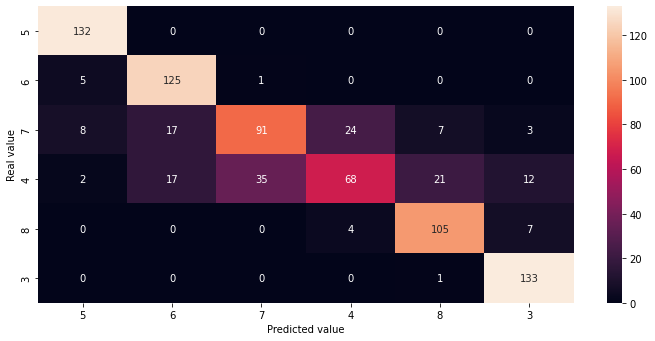

accuracy  score on train : 1.0
accuracy  score on test : 0.7995110024449877
              precision    recall  f1-score   support

           3       0.90      1.00      0.95       132
           4       0.79      0.95      0.86       131
           5       0.72      0.61      0.66       150
           6       0.71      0.44      0.54       155
           7       0.78      0.91      0.84       116
           8       0.86      0.99      0.92       134

    accuracy                           0.80       818
   macro avg       0.79      0.82      0.79       818
weighted avg       0.79      0.80      0.78       818

CPU times: user 589 ms, sys: 14.4 ms, total: 603 ms
Wall time: 654 ms


In [ ]:
%%time
# retrain best model from each approaches 
# 1- KNN
# from those result we can see that n_neighbors=7 is the best value for number of neighbors
# we will test it on the testset now 
# first experement with n_neighbors = 7 and weights = distance not uniform  
knn = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  KNeighborsClassifier(n_neighbors=7, weights='distance'))])
train_and_test(knn, X_train, X_test, y_train, y_test)

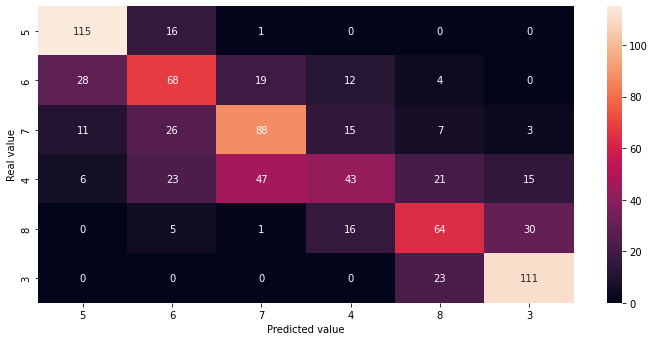

accuracy  score on train : 0.6038762325739544
accuracy  score on test : 0.597799511002445
              precision    recall  f1-score   support

           3       0.72      0.87      0.79       132
           4       0.49      0.52      0.51       131
           5       0.56      0.59      0.58       150
           6       0.50      0.28      0.36       155
           7       0.54      0.55      0.54       116
           8       0.70      0.83      0.76       134

    accuracy                           0.60       818
   macro avg       0.59      0.61      0.59       818
weighted avg       0.58      0.60      0.58       818

CPU times: user 533 ms, sys: 10.1 ms, total: 543 ms
Wall time: 603 ms


In [ ]:
# 2- using Logistic Regression with solver=lbfgs and penality = l2
%%time
from sklearn.linear_model import LogisticRegression
lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver="lbfgs", penalty='l2')) ])
train_and_test(lr, X_train, X_test, y_train, y_test)

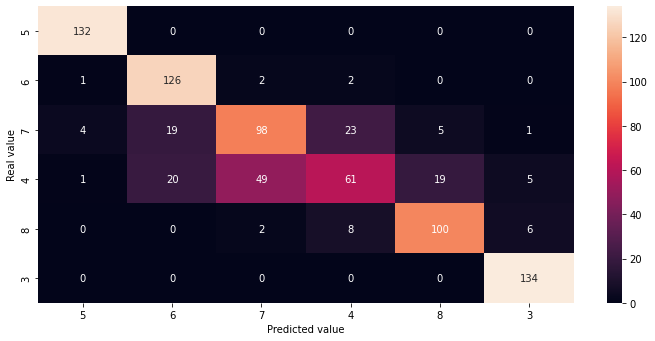

accuracy  score on train : 0.8986739204352261
accuracy  score on test : 0.7958435207823961
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       132
           4       0.76      0.96      0.85       131
           5       0.65      0.65      0.65       150
           6       0.65      0.39      0.49       155
           7       0.81      0.86      0.83       116
           8       0.92      1.00      0.96       134

    accuracy                           0.80       818
   macro avg       0.79      0.81      0.79       818
weighted avg       0.78      0.80      0.78       818

CPU times: user 2.01 s, sys: 18.4 ms, total: 2.03 s
Wall time: 2.08 s


In [ ]:
# 3- using SVM
%%time 
svc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='rbf', probability=True, C=10, max_iter=10000))])
train_and_test(svc, X_train, X_test, y_train, y_test)

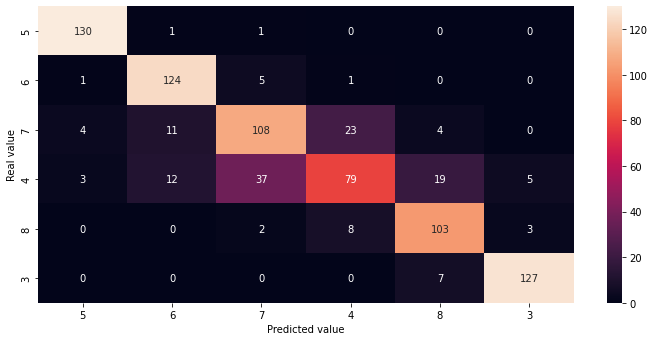

accuracy  score on train : 0.9935396123767426
accuracy  score on test : 0.8202933985330073
              precision    recall  f1-score   support

           3       0.94      0.98      0.96       132
           4       0.84      0.95      0.89       131
           5       0.71      0.72      0.71       150
           6       0.71      0.51      0.59       155
           7       0.77      0.89      0.83       116
           8       0.94      0.95      0.94       134

    accuracy                           0.82       818
   macro avg       0.82      0.83      0.82       818
weighted avg       0.81      0.82      0.81       818

CPU times: user 823 ms, sys: 13.1 ms, total: 836 ms
Wall time: 843 ms


In [ ]:
# 4- using XGBoosing
%%time
XG = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGBClassifier(learning_rate= 0.3, 
                                max_depth= 8, 
                                n_estimators= 20, 
                                subsample= 0.7))])
train_and_test(XG, X_train, X_test, y_train, y_test)



# Approche d'apprentissage d'ensemble
* Dans cette section, nous allons déployer une nouvelle méthode d'ensemble avec une méthode de prédiction appelée profil de décision
* Le profil de décision est une matrice avec des lignes comme classificateurs et des colonnes comme classes, chaque ligne contient une probabilité de prédiction d'un classificateur.
* Nous prendrons la moyenne de chaque colonne, puis sélectionnerons la probabilité la plus élevée en conséquence.

In [ ]:
class Classifier:
    def __init__(self, clf, max_number_of_classes:int):
        """
        Wrapping sklearn classifiers
        clf: sklearn classifiers like (KNN, LogRegression, DecisionTree, etc...)
        max_number_of_classes: integer, number of unique values in the predicted variable.
        """
        self.clf = clf
        self.max_number_of_classes = max_number_of_classes
        self.decision_profile = []
    
    # fit the classifier
    def fit(self, X_train, y_train):
        """
        Call the training function
        X_train: 2d array with shape num_of_samples x num_of_feautres.
        y_train: 1d array with shape (num_of_samples, ) contains the ground truth values.
        """
        self.clf.fit(X_train, y_train)
            
    def predict_proba(self, sample):
        """
        predict the probability of belonging this `sample` to each class
        """
        # sometimes number of unique values in the predicted variable differ from one chunk to another,
        # so that we need to pad the results of probablity prediction to new size equal to `max_number_of_classes`
        pred = self.clf.predict_proba(sample.reshape(1, -1))[0]
        return pred
    
    def build_decision_profile(self, sample):
        """
        add the predict_probability result to the `decision_profile` list
        sample: one example form the dataset
        """
        self.decision_profile.append(self.predict_proba(sample).tolist())   

In [ ]:
from multiprocessing.pool import ThreadPool


class Ensemble:
    def __init__(self, classifiers):
        
        """
        classfiers : list of Classifier objects  
        """
        self.classifiers = classifiers
    

    def fit(self, X_train:np.array, y_train:np.array):
        """
        new_classifiers: list of new classifiers to insert them into ensemble classifiers.
        X_train: training dataset .
        y_train: ground truth values.
        ----------------------------------------------------------------
        return new_classifiers after training.
        """
        
        # use classifier_induction_util for multiprocessing  
        def classifier_induction_util(classifier):
            clf = Classifier(classifier, 8)
            clf.fit(X_train.copy(), y_train.copy())
            return clf 
        # train each new classifier in parallel 
        with ThreadPool(len(self.classifiers)) as pool:
            trained_classifiers = pool.map(classifier_induction_util, self.classifiers)
        # add the trained classifiers to the ensemble classifiers.
        self.classifiers = trained_classifiers
        # return the trained classifiers (new classifiers after training)
        return trained_classifiers
            

    def global_support_degree(self, sample):
        for clf in self.classifiers:
            clf.build_decision_profile(sample)
        profile = np.array([self.classifiers[i].decision_profile[-1] for i in range(len(self.classifiers))])
        return np.argmax(profile.sum(axis=0))
    
    
    def predict(self, X_test):
        y_pred = [self.global_support_degree(sample) for sample in X_test]
        return np.array(y_pred)

In [ ]:
def generate_classifiers():
    classifiers = [
         XGBClassifier(learning_rate= 0.3, 
                                max_depth= 8, 
                                n_estimators= 20, 
                                subsample= 0.7),
        LogisticRegression(solver="lbfgs", penalty='l2', max_iter=10000),

        DecisionTreeClassifier(max_depth=8),
        RandomForestClassifier(),
        SVC(probability=True, C=10, max_iter=10000)
    ]
    return classifiers

In [ ]:
classifiers = generate_classifiers()

In [ ]:
ensemble = Ensemble(classifiers)

In [ ]:
%%time
y_train -= 3
y_test -= 3
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifiers = ensemble.fit(X_train, y_train)

CPU times: user 4.8 s, sys: 28.6 ms, total: 4.83 s
Wall time: 2.93 s


In [ ]:
y_pred = ensemble.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       132
           1       0.84      0.98      0.90       131
           2       0.69      0.71      0.70       150
           3       0.76      0.50      0.60       155
           4       0.82      0.91      0.87       116
           5       0.94      0.99      0.96       134

    accuracy                           0.83       818
   macro avg       0.83      0.85      0.83       818
weighted avg       0.83      0.83      0.82       818



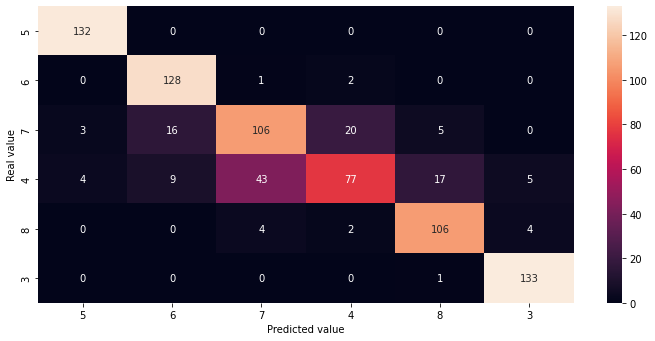

In [ ]:
classification_rep = classification_report(y_test, y_pred, zero_division=0)
print(classification_rep)
con_matrix = confusion_matrix(y_test, y_pred)


# ploting confustion matrix
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show()
